In [1]:
try:
    import obspy
    obspy.read()
except TypeError:
    # Needs to restart the runtime once, because obspy only works properly after restart.
    print('Stopping RUNTIME. If you run this code for the first time, this is expected. Colaboratory will restart automatically. Please run again.')
    exit()

#### 创建模型

In [2]:
import seisbench
import seisbench.models as sbm

In [3]:
model = sbm.PhaseNet()
print(model)

Component order:	ZNE
SeisBench model		PhaseNet

PhaseNet(
  (inc): Conv1d(3, 8, kernel_size=(7,), stride=(1,), padding=same)
  (in_bn): BatchNorm1d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (down_branch): ModuleList(
    (0): ModuleList(
      (0): Conv1d(8, 8, kernel_size=(7,), stride=(1,), padding=same, bias=False)
      (1): BatchNorm1d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv1d(8, 8, kernel_size=(7,), stride=(4,), padding=(3,), bias=False)
      (3): BatchNorm1d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ModuleList(
      (0): Conv1d(8, 16, kernel_size=(7,), stride=(1,), padding=same, bias=False)
      (1): BatchNorm1d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv1d(16, 16, kernel_size=(7,), stride=(4,), bias=False)
      (3): BatchNorm1d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): ModuleList(
      

In [4]:
import torch

x = torch.rand(1, 3, 3001)  # 1 example, 3 components, 3001 samples
model.eval()
with torch.no_grad():
    print(model(x))

tensor([[[0.3460, 0.3461, 0.3453,  ..., 0.3437, 0.3449, 0.3446],
         [0.3919, 0.3918, 0.3921,  ..., 0.3917, 0.3916, 0.3920],
         [0.2621, 0.2621, 0.2626,  ..., 0.2646, 0.2635, 0.2635]]])


#### 加载预训练模型

In [5]:
pretrained_weights = sbm.PhaseNet.list_pretrained(details=True)
for key, value in pretrained_weights.items():
    print(f"{key}:\n{value}\n-----------------------\n")

2025-07-30 10:54:24,079 | seisbench | WARNING | The download precheck failed with a timeout. This is not an error itself, but might indicate a subsequent error. If you encounter an error, this might be caused by the firewall setup of your network. Please check https://github.com/seisbench/seisbench#known-issues for details.

As a mitigation, you might be able to switch to our backup repository at the cost of lower download speeds. To switch, run 'seisbench.use_backup_repository'.
2025-07-30 10:55:05,473 | seisbench | WARNING | The download precheck failed with a timeout. This is not an error itself, but might indicate a subsequent error. If you encounter an error, this might be caused by the firewall setup of your network. Please check https://github.com/seisbench/seisbench#known-issues for details.

As a mitigation, you might be able to switch to our backup repository at the cost of lower download speeds. To switch, run 'seisbench.use_backup_repository'.


diting:
Model trained on the DiTing dataset, a large-scale Chinese seismic benchmark dataset.
For models fine-tuned on individual regions in China, please see: https://github.com/JUNZHU-SEIS/USTC-Pickers
If you use this model, please reference: Zhu J, Li ZF and Fang LH (2023). USTC-Pickers: a Unified Set of seismic phase pickers Transfer learned for China. Earthq Sci 36(2): 95–112, doi: 10.1016/j.eqs.2023.03.001
-----------------------

ethz:
Model trained on ETHZ for 100 epochs with a learning rate of 0.01.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)
-----------------------

geofon:
Model trained on GEOFON for 100 epochs with a learning rate of 0.001.
Threshold selected for optimal F1 score on in-d

In [6]:
model = sbm.PhaseNet.from_pretrained("original")
print(model.weights_docstring)

2025-07-30 10:56:48,192 | seisbench | WARNING | The download precheck failed with a timeout. This is not an error itself, but might indicate a subsequent error. If you encounter an error, this might be caused by the firewall setup of your network. Please check https://github.com/seisbench/seisbench#known-issues for details.

As a mitigation, you might be able to switch to our backup repository at the cost of lower download speeds. To switch, run 'seisbench.use_backup_repository'.
Downloading: 100%|██████████| 1.06M/1.06M [00:01<00:00, 743kB/s] 


Original PhaseNet model from Zhu et al. (2018). Originally published under MIT License. Original available at https://github.com/AI4EPS/PhaseNet/tree/master/model/190703-214543 . 

Converted to SeisBench by Jannes Münchmeyer (munchmej@univ-grenoble-alpes.fr) with help from Sacha Lapins, Yiyuan Zhong, and Jun Zhu


#### 注释波形流

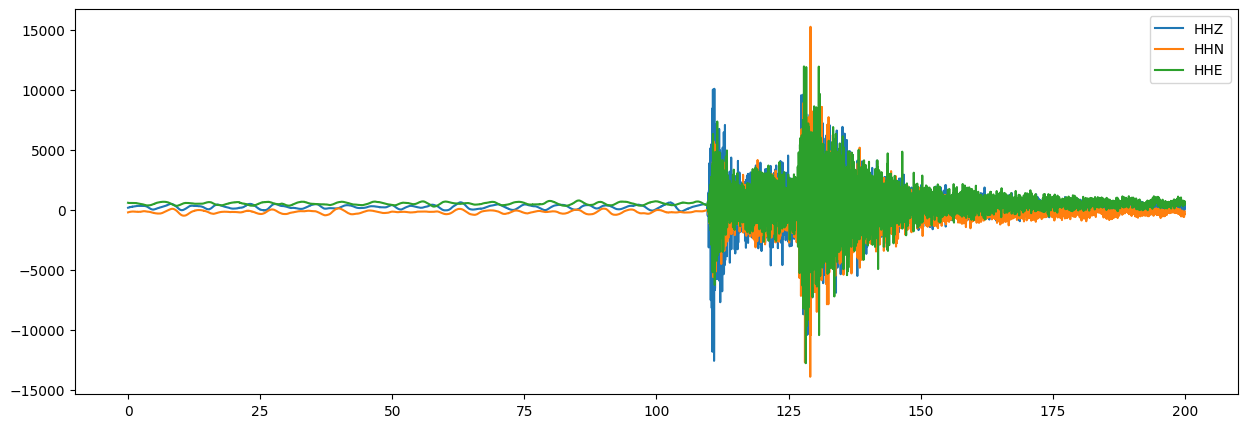

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("GFZ")

t = UTCDateTime("2007/01/02 05:48:50")
stream = client.get_waveforms(network="CX", station="PB01", location="*", channel="HHZ", starttime=t-100, endtime=t+100)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for i in range(3):
    ax.plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
ax.legend()

In [8]:
annotations = model.annotate(stream)
print(annotations)

3 Trace(s) in Stream:
CX.PB01..PhaseNet_N | 2007-01-02T05:47:12.498392Z - 2007-01-02T05:50:27.498392Z | 100.0 Hz, 19501 samples
CX.PB01..PhaseNet_P | 2007-01-02T05:47:12.498392Z - 2007-01-02T05:50:27.498392Z | 100.0 Hz, 19501 samples
CX.PB01..PhaseNet_S | 2007-01-02T05:47:12.498392Z - 2007-01-02T05:50:27.498392Z | 100.0 Hz, 19501 samples


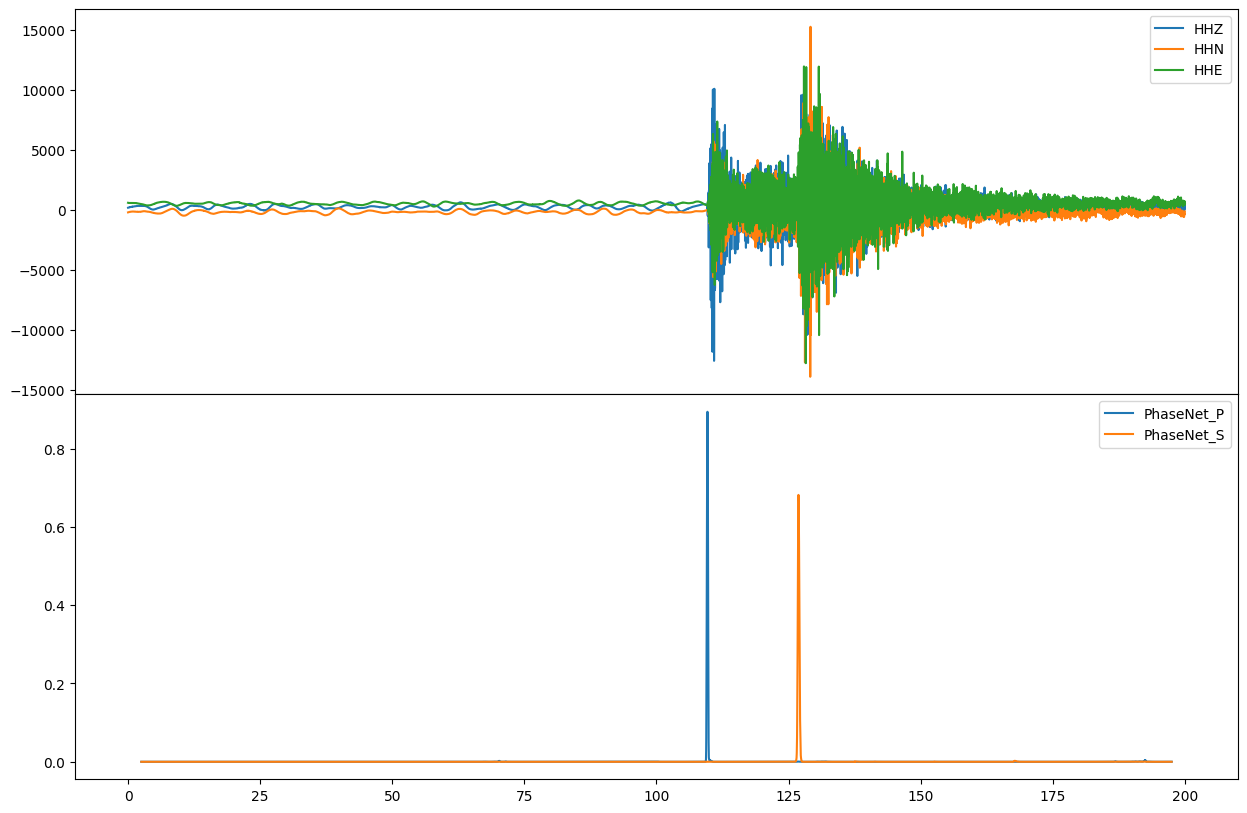

In [9]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    if annotations[i].stats.channel[-1] != "N":  # Do not plot noise curve
        axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()

In [18]:
output = model.classify(stream, P_threshold=0.5, S_threshold=0.5)
print(output)

ClassifyOutput(creator='EQTransformer', picks=PickList with 2 entries:

CX.PB01.	2007-01-02T05:48:59.548392Z	P
CX.PB01.	2007-01-02T05:49:16.808392Z	S, detections=DetectionList with 1 entries:

CX.PB01.	2007-01-02T05:48:59.618392Z	2007-01-02T05:49:34.988392Z)


In [20]:
# 找到最大概率点及其值
import numpy as np
p_probs = annotations.select(channel="*P")[0].data
s_probs = annotations.select(channel="*S")[0].data

p_max_idx = np.argmax(p_probs)
s_max_idx = np.argmax(s_probs)

print(f"P波最大概率: {p_probs[p_max_idx]}")
print(f"S波最大概率: {s_probs[s_max_idx]}")

P波最大概率: 0.8950014710426331
S波最大概率: 0.8181348443031311


In [11]:
print(output.picks)

PickList with 2 entries:

CX.PB01.	2007-01-02T05:48:59.648392Z	P
CX.PB01.	2007-01-02T05:49:16.868392Z	S


#### 模型可互换性

In [12]:
model = sbm.EQTransformer.from_pretrained("stead")
print(model.weights_docstring)

Downloading: 100%|██████████| 1.52M/1.52M [00:01<00:00, 980kB/s] 


Model trained on STEAD for 100 epochs with a learning rate of 0.001.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


3 Trace(s) in Stream:
CX.PB01..EQTransformer_Detection | 2007-01-02T05:47:14.998392Z - 2007-01-02T05:50:24.998392Z | 100.0 Hz, 19001 samples
CX.PB01..EQTransformer_P         | 2007-01-02T05:47:14.998392Z - 2007-01-02T05:50:24.998392Z | 100.0 Hz, 19001 samples
CX.PB01..EQTransformer_S         | 2007-01-02T05:47:14.998392Z - 2007-01-02T05:50:24.998392Z | 100.0 Hz, 19001 samples


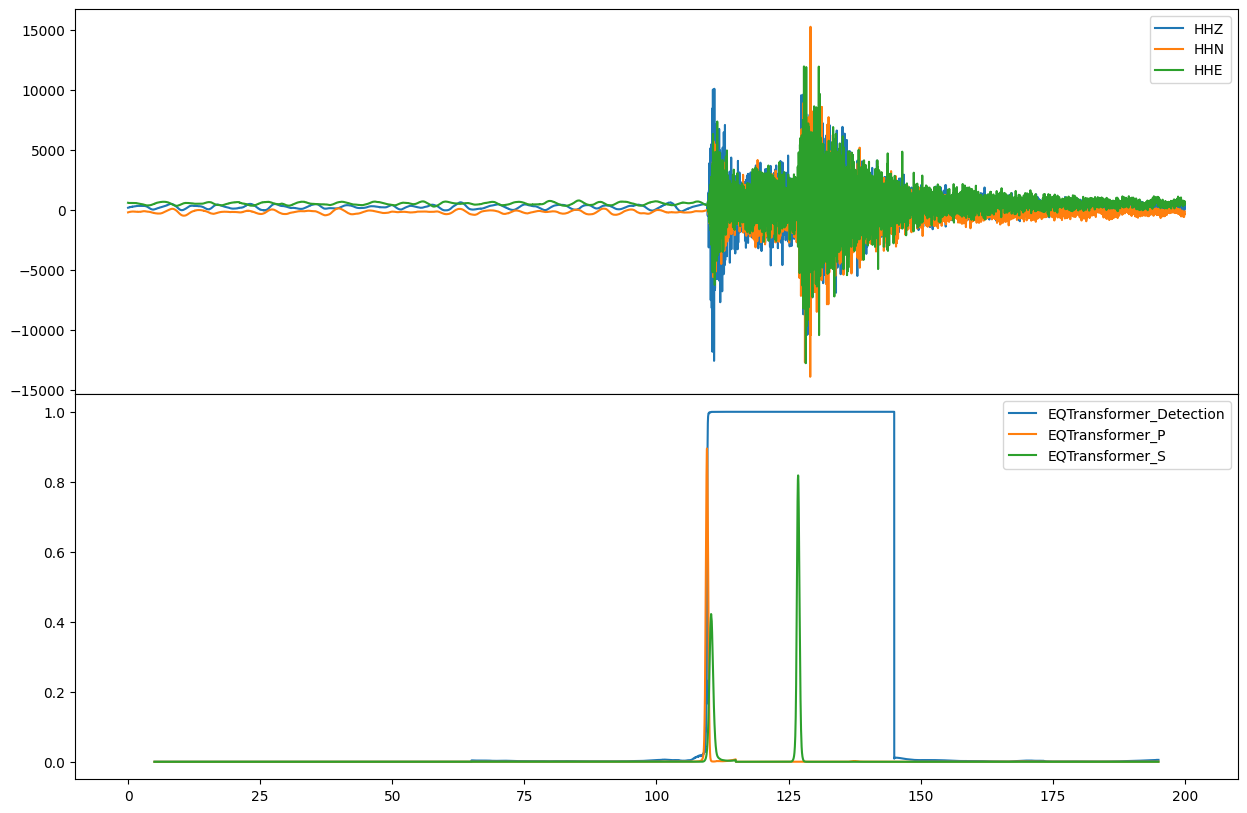

In [22]:
annotations = model.annotate(stream)
print(annotations)

fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    if annotations[i].stats.channel[-1] != "N":  # Do not plot noise curve
        axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()

In [ ]:
output = model.classify(stream)
print(output)

ClassifyOutput(creator='EQTransformer', picks=PickList with 2 entries:

CX.PB01.	2007-01-02T05:48:59.548392Z	P
CX.PB01.	2007-01-02T05:49:16.808392Z	S, detections=DetectionList with 1 entries:

CX.PB01.	2007-01-02T05:48:59.618392Z	2007-01-02T05:49:34.988392Z)


In [24]:
print(output.picks)
print(output.detections)

PickList with 2 entries:

CX.PB01.	2007-01-02T05:48:59.548392Z	P
CX.PB01.	2007-01-02T05:49:16.808392Z	S
DetectionList with 1 entries:

CX.PB01.	2007-01-02T05:48:59.618392Z	2007-01-02T05:49:34.988392Z


In [25]:
# 找到最大概率点及其值
import numpy as np
p_probs = annotations.select(channel="*P")[0].data
s_probs = annotations.select(channel="*S")[0].data

p_max_idx = np.argmax(p_probs)
s_max_idx = np.argmax(s_probs)

print(f"P波最大概率: {p_probs[p_max_idx]}")
print(f"S波最大概率: {s_probs[s_max_idx]}")

P波最大概率: 0.8950014710426331
S波最大概率: 0.8181348443031311


In [30]:
# 找到检测概率最大值及其位置
import numpy as np

# 检查是否有检测概率通道(D)或噪声概率通道(N)
if annotations.select(channel="*D"):
    det_probs = annotations.select(channel="*D")[0].data
    channel_type = "Detection"
    # 检测概率直接使用
    max_prob = np.max(det_probs)
    max_idx = np.argmax(det_probs)
elif annotations.select(channel="*N"):
    noise_probs = annotations.select(channel="*N")[0].data
    channel_type = "Noise"
    # 噪声概率需要取反(1-噪声概率=检测概率)
    det_probs = 1.0 - noise_probs
    max_prob = np.max(det_probs)
    max_idx = np.argmax(det_probs)
else:
    print("未找到检测或噪声概率通道")
    det_probs = None
    channel_type = None
    max_prob = None
    max_idx = None

# 打印结果
if max_prob is not None:
    print(f"使用{channel_type}通道")
    print(f"事件检测最大概率: {max_prob}")
    
    # 获取对应时间点（相对于annotations起始时间）
    if annotations.select(channel="*D") or annotations.select(channel="*N"):
        channel_to_use = "*D" if annotations.select(channel="*D") else "*N"
        trace = annotations.select(channel=channel_to_use)[0]
        max_time = trace.stats.starttime + max_idx / trace.stats.sampling_rate
        print(f"最大概率时间点: {max_time}")

使用Noise通道
事件检测最大概率: 0.9999978542327881
最大概率时间点: 2007-01-02T05:47:16.608392Z


#### 批处理

In [29]:
if torch.cuda.is_available():
    model.cuda()
    print("Running on GPU")
else:
    print("NOT running on GPU")

NOT running on GPU


In [32]:
stream = client.get_waveforms(network="CX", station="*", location="*", channel="HH?", starttime=t-100, endtime=t+100)

output = model.classify(stream)
print(output.picks)
print(output.detections)

PickList with 12 entries:

CX.HMBCX.	2007-01-02T05:49:05.810002Z	P
CX.HMBCX.	2007-01-02T05:49:27.680002Z	S
CX.PATCX.	2007-01-02T05:49:06.279999Z	P
...
CX.PB03.	2007-01-02T05:49:26.208392Z	S
CX.PB04.	2007-01-02T05:49:35.298392Z	S
CX.PB05.	2007-01-02T05:49:15.198392Z	P
DetectionList with 11 entries:

CX.PB03.	2007-01-02T05:48:44.998392Z	2007-01-02T05:48:55.038392Z
CX.PB04.	2007-01-02T05:48:45.378392Z	2007-01-02T05:49:00.578392Z
CX.PB01.	2007-01-02T05:48:59.618392Z	2007-01-02T05:49:34.988392Z
...
CX.PSGCX.	2007-01-02T05:49:12.550005Z	2007-01-02T05:50:04.990005Z
CX.PB05.	2007-01-02T05:49:15.308392Z	2007-01-02T05:50:04.988392Z
CX.MNMCX.	2007-01-02T05:49:15.000004Z	2007-01-02T05:50:04.990004Z
